# IST 718: Big Data Analytics

- Professor: Daniel Acuna <deacuna@syr.edu>
- TAs: Tong Zeng <tozeng@syr.edu>, Priya Matnani <psmatnan@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers either from your classmates or from the internet__
- You can put the homework files anywhere you want in your http://notebook.acuna.io workspace but _do not change_ the file names. The TAs and the professor use these names to grade your homework.
- Remove or comment out code that contains `raise NotImplementedError`. This is mainly to make the `assert` statement fail if nothing is submitted.
- The tests shown in some cells (i.e., `assert` and `np.testing.` statements) are used to grade your answers. **However, the professor and TAs will use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before downloading and submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`). 
- Good luck!

In [1]:
# import packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 3. Basic Python programming

**Question 3.1 (10 pts)** Reverse the words in a sentence. Implement a function `scramble_sentence` that takes a sentence as a string and returns a string where the words have been reversed. For example, `scramble_sentence("Hello World")` should return `"olleH dlroW"`. Consider that strings are just like any other sequence such as lists and tuples and therefore can be accessed with the slice notation. Also you can use the method `slice` of string object to split a sentence into its individual words and `join` to put a list of strings inside another string. For example, `" ".join(["hello", "world"])` will create `"hello world"`. You can use list comprehensions or for-loops to solve this problem.

In [2]:
# Create the function scramble_sentence below

def scramble_sentence(sentence):
    words = sentence.split()
    for index, word in enumerate(words):
        n= len(word)
        for letter in word:
            word = list(word)
            word[n-1]=letter
            n=n-1
            word = "".join(word)
            words[index] = word
    return " ".join(words)
   
    
    
print(scramble_sentence("Hello World"))

olleH dlroW


In [3]:
# 10 pts
np.testing.assert_equal(scramble_sentence("Hello World"), "olleH dlroW")
np.testing.assert_equal(scramble_sentence("Data Science"), "ataD ecneicS")

**Question 3.2 (10 pts)** Basic statistics. Create a function `statistic` which receives two parameters: a list of floating point numbers and a statistic. The statistic will be a string containing either `"max"`, `"min"`, or `"average"`. The function will return the provided statistic of the list. For example, `statistic([1.0, 3.5, 6.0], "max")` should return `6.0`, `statistic([1.0, 3.5, 6.0], "min")` should return `1.0`, and `statistic([1.0, 3.5, 6.0], "average")` should return `3.5`. If the statistic provided is not part of min, max, or average, return the string "Error". Don't assume that the list is a numpy array but rather a vanilla Python list.

In [4]:
# create the function statistic here

def statistic(fp_list, statistic):
    if(statistic == "max"):
        return max(fp_list)
    elif(statistic == "min"):
        return min(fp_list)
    elif(statistic == "average"):
        return sum(fp_list)/len(fp_list)
    else:
        return "Error"



In [5]:
# 10 pts
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "max"), 6.0)
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "min"), 1.0)
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "average"), 3.5)
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "mode"), "Error")

**Question 3.3 (Numpy, 10 pts)** Estimate the value of $\sqrt[3]{3}$ by simulation. In class, we saw an example of how to estimate $ \pi $ using number random generation. In this question, you will estimate the cube root of 3 using a similar idea. 

You can generate uniform random numbers between 0 and 1 using the method `numpy.random.random` in the package `numpy`. For example:

In [6]:
import numpy.random
x = numpy.random.random(size=5)
print(x)

[0.2445668  0.19512511 0.98517848 0.86956743 0.18109517]


`x` has an numpy array of 5 random numbers between 0 and 1. Notice that you can create a list of random numbers between 0 and 2 by simply multiplying `x` by 2:

In [7]:
x*2

array([0.4891336 , 0.39025023, 1.97035695, 1.73913486, 0.36219033])

We will use this fact to estimate the side $r$ of a cube whose volume is 3. It is easy to notice that $r \leq 3$ because $r^3 = 3$. We will use this fact in the simulation. Specifically, we can estimate $\sqrt[3]{3}$ by generating random cubes with sides between 0 and 3 with `numpy`. Then we can estimate the ratio $p$ of times these random cubes have a volume less or equal to 3. This ratio will represent approximately $ p \approx \frac{\sqrt{3}}{3} $ (why is this?). Use this fact to estimate $\sqrt[3]{3}$. **Of course do not use `np.power` or a similar function in any of your calculations.** Use a sample of 100000 random numbers.

Below, create the following variables:

- `s`: random sides of your cubes
- `p`: ratio of times the random cubes are less or equal to 3
- `sqrt3of3`: your estimation of the cube root of 3 based on `s` and `p`

In [8]:
# Put your answer in this cell. Create variables s, p, and sqrt3of3 here
import numpy as np

s = 3*np.random.random(100000)
cubes = s**3
gthan3 = cubes 
gthan3[gthan3<=3] = 1
gthan3[gthan3>3] = 0
p = sum(gthan3)/len(cubes)
sqrt3of3 = 3*p


In [9]:
# 2 pts
np.testing.assert_equal(type(s), np.ndarray)
np.testing.assert_equal(s.shape, (100000, ))

In [10]:
# 2 pts
np.testing.assert_equal(type(p), np.float64)

In [11]:
# 6 pts
np.testing.assert_almost_equal(sqrt3of3, np.power(3, 1/3), decimal=2)

## Matplotlib

In [12]:
# import needed packages
import matplotlib.pyplot as plt
import numpy as np

Use the following dataset

In [13]:
# create the data
group = np.array(['young', 'old', 'young', 'young', 'young', 'old', 'young', 'old', 'old', 
                  'young', 'young', 'old', 'young', 'young', 'old', 'old', 'old', 'old', 'old', 
                  'young', 'old', 'old', 'young', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 
                  'young', 'young', 'young', 'old', 'young', 'old', 'old', 'old', 'young', 'young', 
                  'old', 'old', 'young', 'old', 'old', 'young', 'old', 'young', 'old', 'young', 'young', 
                  'young', 'old', 'young', 'old', 'old', 'young', 'young', 'old', 'old', 'young', 'old', 
                  'old', 'young', 'young', 'young', 'young', 'young', 'old', 'old', 'old', 'old', 'young', 
                  'old', 'old', 'young', 'old', 'old', 'old', 'old', 'old', 'old', 'young', 'young', 
                  'old', 'young', 'old', 'old', 'old', 'old', 'young', 'young', 'young', 'old',
                  'old', 'young', 'old', 'old', 'young', 'young'])
age = np.array([37.0, 41.0, 42.0, 41.0, 36.0, 46.0, 31.0, 43.0, 46.0, 36.0, 36.0, 43.0, 28.0, 35.0, 
                46.0, 51.0, 41.0, 51.0, 55.0, 38.0, 50.0, 52.0, 44.0, 43.0, 49.0, 52.0, 54.0, 42.0, 
                44.0, 51.0, 33.0, 38.0, 33.0, 47.0, 35.0, 47.0, 46.0, 40.0, 36.0, 35.0, 44.0, 44.0, 
                31.0, 51.0, 44.0, 34.0, 52.0, 36.0, 51.0, 38.0, 39.0, 29.0, 38.0, 42.0, 47.0, 44.0, 
                39.0, 24.0, 51.0, 41.0, 36.0, 41.0, 46.0, 28.0, 24.0, 32.0, 36.0, 36.0, 46.0, 55.0, 
                55.0, 38.0, 36.0, 47.0, 37.0, 29.0, 45.0, 44.0, 45.0, 44.0, 47.0, 44.0, 39.0, 35.0, 
                42.0, 35.0, 39.0, 47.0, 45.0, 41.0, 35.0, 41.0, 34.0, 41.0, 39.0, 34.0, 43.0, 42.0, 
                36.0, 32.0])
income = np.array([38202.0, 44883.0, 42011.0, 35934.0, 35561.0, 42219.0, 35113.0, 42141.0, 41041.0, 
                   38442.0, 37445.0, 40634.0, 32318.0, 37991.0, 43268.0, 45893.0, 39100.0, 48929.0, 
                   47271.0, 36575.0, 44893.0, 49479.0, 37809.0, 41565.0, 43805.0, 43887.0, 49753.0, 
                   41668.0, 38260.0, 47663.0, 35522.0, 37105.0, 34757.0, 41890.0, 40052.0, 42313.0, 
                   40720.0, 37984.0, 40259.0, 33736.0, 45272.0, 42000.0, 31468.0, 51204.0, 40887.0, 
                   38974.0, 46151.0, 35729.0, 48820.0, 42052.0, 35463.0, 32899.0, 42328.0, 44504.0, 
                   45697.0, 42009.0, 41934.0, 31368.0, 47346.0, 39064.0, 35646.0, 41512.0, 46011.0, 
                   30096.0, 27235.0, 32728.0, 39859.0, 40774.0, 46112.0, 49337.0, 51348.0, 36289.0, 
                   40332.0, 47470.0, 36637.0, 31849.0, 40644.0, 44750.0, 47441.0, 40280.0, 44322.0, 
                   43532.0, 39243.0, 34646.0, 39483.0, 38488.0, 38063.0, 43645.0, 40608.0, 37451.0, 
                   33825.0, 38936.0, 36828.0, 40781.0, 40228.0, 34174.0, 38186.0, 41781.0, 31930.0, 
                   34096.0])

**Question 3.4: (5 pts)** Below, plot the histogram of the income of the "old" population. Use the `group` variable to select from `income` the appropriate datapoints.

(array([ 3.,  6.,  8., 11.,  6.,  6.,  5.,  5.,  5.,  2.]),
 array([36289. , 37794.9, 39300.8, 40806.7, 42312.6, 43818.5, 45324.4,
        46830.3, 48336.2, 49842.1, 51348. ]),
 <a list of 10 Patch objects>)

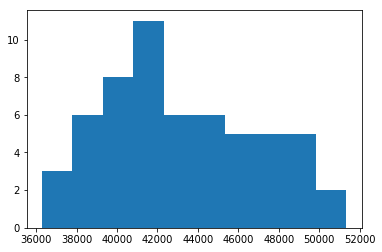

In [14]:
# 5 pts
plt.hist(x=income[group=='old'])

**Question 3.5:** (5 pts) Produce one scatter plot using `plt.scatter` to depic the relationship between `age` and `income`.  However, put the scatter plot of the 'young' group in green and the 'old' group in 'blue'. **The plot must have a legend describing the groups, a title describing the relationship plotted, and labels for both axes.**

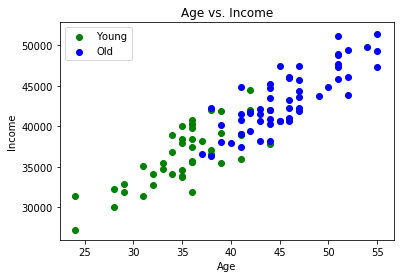

In [15]:
# 5 pts
plt.scatter(age[group=="young"], income[group=='young'], color="Green", label = 'Young')
plt.scatter(age[group=="old"], income[group=='old'], color='Blue', label = 'Old')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs. Income")
plt.legend()









# Pandas

using a modified dataset from above

In [16]:
# import needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create the data
group2 = np.array(['young', 'old', 'young', 'young', 'young', 'old', 'young', 'old', 'old', 'young', 
                   'young', 'old', 'young', 'young', 'old', 'old', 'old', 'old', 'old', 'young', 'old', 
                   'old', 'young', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'young', 'young',
                   'young', 'old', 'young', 'old', 'old', 'old', 'young', 'young', 'old', 'old', 'young', 
                   'old', 'old', 'young', 'old', 'young', 'old', 'young', 'young', 'young', 'old', 'young',
                   'old', 'old', 'young', 'young', 'old', 'old', 'young', 'old', 'old', 'young', 'young',
                   'young', 'young', 'young', 'old', 'old', 'old', 'old', 'young', 'old', 'old', 'young', 
                   'old', 'old', 'old', 'old', 'old', 'old', 'young', 'young', 'old', 'young', 'old', 'old',
                   'old', 'old', 'young', 'young', 'young', 'old', 'old', 'young', 'old', 'old', 'young', 'young'])
age2 = np.array([37.0, 41.0, 42.0, 41.0, 36.0, 46.0, 31.0, 43.0, 46.0, 36.0, 36.0, None, 28.0, 35.0, 
                 46.0, 51.0, 41.0, 51.0, 55.0, 38.0, 50.0, 52.0, 44.0, 43.0, 49.0, 52.0, 54.0, 42.0, 
                 44.0, 51.0, 33.0, 38.0, 33.0, 47.0, 35.0, 47.0, 46.0, 40.0, 36.0, 35.0, 44.0, 44.0, 
                 None, 51.0, 44.0, 34.0, 52.0, 36.0, 51.0, 38.0, 39.0, 29.0, 38.0, 42.0, 47.0, None, 
                 39.0, 24.0, 51.0, 41.0, 36.0, 41.0, 46.0, 28.0, 24.0, 32.0, 36.0, 36.0, 46.0, 55.0, 
                 55.0, 38.0, 36.0, 47.0, 37.0, 29.0, 45.0, 44.0, 45.0, 44.0, 47.0, 44.0, 39.0, 35.0, 
                 42.0, 35.0, 39.0, 47.0, 45.0, 41.0, 35.0, 41.0, 34.0, 41.0, 39.0, 34.0, 43.0, 42.0, 
                 36.0, 32.0], float)
income2 = np.array([38202.0, 44883.0, 42011.0, 35934.0, 35561.0, 42219.0, 35113.0, 42141.0, 41041.0, 
                    38442.0, 37445.0, 40634.0, 32318.0, 37991.0, 43268.0, 45893.0, 39100.0, 48929.0, 
                    47271.0, 36575.0, 44893.0, 49479.0, 37809.0, 41565.0, 43805.0, 43887.0, 49753.0, 
                    41668.0, 38260.0, 47663.0, 35522.0, 37105.0, 34757.0, 41890.0, 40052.0, 42313.0,
                    40720.0, 37984.0, 40259.0, None, 45272.0, 42000.0, 31468.0, 51204.0, 40887.0, 
                    38974.0, 46151.0, 35729.0, 48820.0, 42052.0, 35463.0, 32899.0, 42328.0, 44504.0, 
                    45697.0, 42009.0, 41934.0, 31368.0, 47346.0, 39064.0, 35646.0, 41512.0, 46011.0, 
                    30096.0, 27235.0, 32728.0, 39859.0, 40774.0, 46112.0, 49337.0, 51348.0, 36289.0,
                    None, 47470.0, 36637.0, 31849.0, 40644.0, 44750.0, 47441.0, 40280.0, 44322.0, 
                    43532.0, 39243.0, 34646.0, 39483.0, 38488.0, 38063.0, 43645.0, 40608.0, 37451.0,
                    33825.0, 38936.0, 36828.0, 40781.0, 40228.0, 34174.0, 38186.0, 41781.0, None, 34096.0], float)

**Question 3.6:** (5 pts): Create a dataframe `df` that contains three columns with names `group`, `age`, and `income`, respectively, based on the variables `group2`, `age2`, and `income2` created in the cell above. Use the Pandas DataFrame functionality to compute the mean age and income of each group assign them to `avg_age` and `avg_income`

In [17]:
# Create the variables df, avg_age, and avg_income below
import pandas as pd
data = {'group':group2,'age':age2,'income':income2}
df = pd.DataFrame(data)
avg_age = df["age"].mean()
print(avg_age)
avg_income = df["income"].mean()
print(avg_income)

41.09278350515464
40452.14432989691


In [18]:
# 5 pts
np.testing.assert_equal(set(df.columns), {'age', 'group', 'income'})
np.testing.assert_approx_equal(avg_age, 41.09, significant=1)
np.testing.assert_approx_equal(avg_income, 40452.14, significant=1)

**Question 3.7:** (5 pts) Standardize features. Standardized the age and income in the dataframe from Question 5.1. Standardization is the process of subtracting the mean of a feature and dividing the result by the standard deviation of the feature. Use the `apply` method of a dataframe to apply a function to the age and income series to achieve this result. Remember that `apply` will apply the function to all series so it will not work with the `group` series because it contains strings. Therefore, you must select the appropriate columns first. Create a variable `df2` with the resulting dataframe.

In [19]:
# create the dataframe df2 here

standardized_income = df["income"].apply(lambda x: (x-df["income"].mean())/(df["income"].std()))
standardized_age= df["age"].apply(lambda x: (x-df["age"].mean())/(df["age"].std()))

data = {'group':group2,'age':standardized_age,'income':standardized_income}
df2 = pd.DataFrame(data)


In [20]:
# 5 points
np.testing.assert_equal(set(df2.columns), {'age', 'group', 'income'})
np.testing.assert_almost_equal(df2['age'].mean(), 0)
np.testing.assert_almost_equal(df2['age'].std(), 1, decimal=1)
np.testing.assert_almost_equal(df2['income'].mean(), 0)
np.testing.assert_almost_equal(df2['income'].std(), 1, decimal=1)
np.testing.assert_array_equal(df['group'], df2['group'])